<a href="https://colab.research.google.com/github/invegat/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module1-OLS-regression/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [3]:
!pip install -U matplotlib


    100% |████████████████████████████████| 12.9MB 2.5MB/s 
    100% |████████████████████████████████| 952kB 20.2MB/s 
yellowbrick 0.9 has requirement matplotlib<3.0,>=1.5.1, but you'll have matplotlib 3.0.2 which is incompatible.
  Found existing installation: matplotlib 2.1.2
    Uninstalling matplotlib-2.1.2:
      Successfully uninstalled matplotlib-2.1.2
  [matplotlib, mpl_toolkits]
You must restart the runtime in order to use newly installed versions.


In [2]:
%matplotlib inline
import matplotlib
matplotlib._version.sys.version

'3.6.7 (default, Oct 22 2018, 11:32:17) \n[GCC 8.2.0]'

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
df['datestamp'] = df.date.apply(lambda d: datetime.strptime(d[:8], '%Y%m%d').timestamp())
dfn = df.drop('date', inplace=False, axis=1)

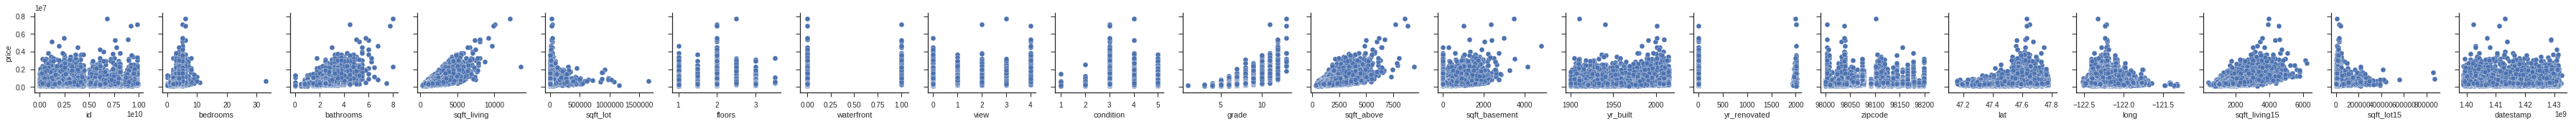

In [6]:
sns.set(style='ticks', color_codes=True)
independant_columns = dfn.columns.drop('price')
sns.pairplot(data=dfn,
                  y_vars=['price'],
                  x_vars=independant_columns);

In [0]:

price = dfn.price
dfxp = dfn.drop(['id', 'price'],inplace=False, axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(dfxp, price, test_size=.5, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train.grade.values.reshape(-1,1), Y_train)

print("Slope Coefficient: ", model.coef_[0])
print("\nIntercept Value: ", model.intercept_)

Slope Coefficient:  201872.76402274036

Intercept Value:  -1009758.1568816203


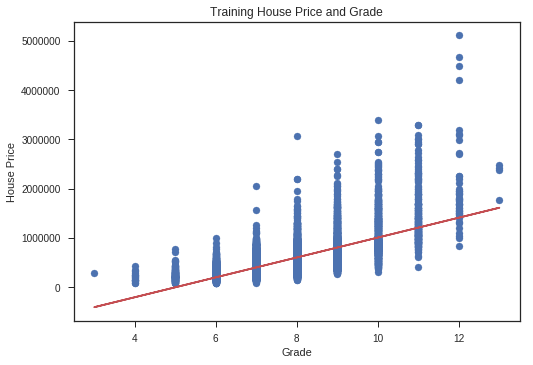

In [9]:

m_hat = model.coef_[0]
b_hat = model.intercept_



# Plot the points
plt.scatter(X_train.grade, Y_train)

# Plot the line
#y_hat = [m_hat*x + b_hat for x in X_train.grade.values]
y_hat = model.predict(X_train.grade.values.reshape(-1,1))
plt.plot(X_train.grade.values.reshape(-1,1), y_hat,c='r')

# Graph axes and title
plt.ylabel("House Price")
plt.xlabel("Grade")
plt.title("Training House Price and Grade")
plt.show()

In [10]:
y_test_predict = model.predict(X_test.grade.values.reshape(-1,1))

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print(f'Grade - Price\nMSE is {MSE}')
print(f'RMSE is {RMSE}')

R2 = r2_score(Y_test, y_test_predict)

print(f'R^2 is {R2}')

Grade - Price
MSE is 84758775134.75513
RMSE is 291133.6035821958
R^2 is 0.4309667377739639


# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [11]:

X = X_train[['grade','sqft_living']]
y = Y_train.values

# Our data needs to have this shape to be accepted by sklearn
print(X.shape)
print(y.shape)
model.fit(X, y)
print("Slope Coefficient: ", model.coef_)
print("\nIntercept Value: ", model.intercept_)
	

(10806, 2)
(10806,)
Slope Coefficient:  [103065.16259903    167.10832275]

Intercept Value:  -599835.661858118


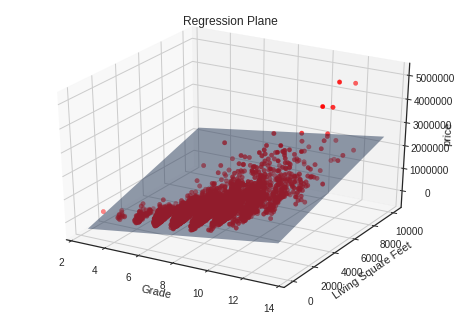

In [12]:

m_grade_hat = model.coef_[0]
m_sqft_living_hat = model.coef_[1]
b_hat = model.intercept_


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(X_train.grade, X_train['sqft_living'], Y_train,c='red')

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = m_grade_hat*xx + m_sqft_living_hat*yy + b_hat        


# Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz,alpha=0.5)
plt.title("Regression Plane")
ax.set(xlabel='Grade', ylabel='Living Square Feet', zlabel='price')
plt.show()

In [13]:
X = X_train[['grade','sqft_living']]
model.fit(X, Y_train)
y_test_predict = model.predict(X_test[['grade','sqft_living']])

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print(f'Grade and Square Foot Living vs Price\nMSE is {MSE}')
print(f'RMSE is {RMSE}')

R2 = r2_score(Y_test, y_test_predict)

print(f'R^2 is {R2}')

Grade and Square Foot Living vs Price
MSE is 70544952427.10254
RMSE is 265602.9977750676
R^2 is 0.5263921128006677


# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [14]:
X = X_train
y = Y_train

# Our data needs to have this shape to be accepted by sklearn
print(X.shape)
print(y.shape)
model.fit(X, y)
print("Slope Coefficient: ", model.coef_)
print("\nIntercept Value: ", model.intercept_)

(10806, 19)
(10806,)
Slope Coefficient:  [-3.41894790e+04  3.97359969e+04  9.90880829e+01  1.03520663e-01
  1.06736065e+04  5.74338866e+05  5.34269293e+04  2.62379506e+04
  9.98866523e+04  5.98253450e+01  3.92627390e+01 -2.47261500e+03
  2.26702693e+01 -5.41214168e+02  5.93257026e+05 -1.84265800e+05
  2.66226363e+01 -3.72680696e-01  1.42924790e-03]

Intercept Value:  4503972.890080354


In [16]:
model.fit(X_train, Y_train)
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print(f'All columns vs Price\nMSE is {MSE}')
print(f'RMSE is {RMSE}')

R2 = r2_score(Y_test, y_test_predict)

print(f'R^2 is {R2}')

All columns vs Price
MSE is 46384610560.05111
RMSE is 215370.8674822366
R^2 is 0.6885940574045981


In [17]:
y = Y_train.values
r2_values = []
for c in X_train.columns.values:
  X = X_train[c].values.reshape(-1, 1)
  model.fit(X,y)
  y_train_predict = model.predict(X)
  r2_values.append((r2_score(y,y_train_predict),c))
r2_values.sort(reverse=True, key=lambda o: o[0])
print(r2_values[0])
print(r2_values[1])

  
  

(0.491324563694172, 'sqft_living')
(0.46201844894086763, 'grade')


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
